In [7]:
%matplotlib inline
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
sys.path.insert(0,'../')
import surfdist as sd
from surfdist import viz, load, utils, surfdist

In [8]:
# load surface data and other variables
cmap = 'coolwarm'
base_dir = '/Applications/freesurfer/subjects/'
surf = nib.freesurfer.read_geometry(os.path.join(base_dir, 'bert/surf/lh.pial'))
cort = np.sort(nib.freesurfer.read_label(os.path.join(base_dir, 'bert/label/lh.cortex.label')))
sulc = nib.freesurfer.read_morph_data(os.path.join(base_dir, 'bert/surf/lh.sulc'))

# Calculate and display distance from central sulcus at each node:

In [ ]:
# print all label names
sd.load.get_freesurfer_label(os.path.join(base_dir, 'bert/label/lh.aparc.a2009s.annot'))

In [ ]:
# load central sulcus nodes
region = 'S_central'
src  = sd.load.load_freesurfer_label(os.path.join(base_dir, 'fsaverage4/label/lh.aparc.a2009s.annot'), region, cort)

# calculate distance
dist = sd.surfdist.dist_calc(surf, cort, src)
print np.shape(dist)

In [11]:
dist1 = dist.copy()
dist1[cort] = (dist1[cort] - np.max(dist1[cort])) * -1

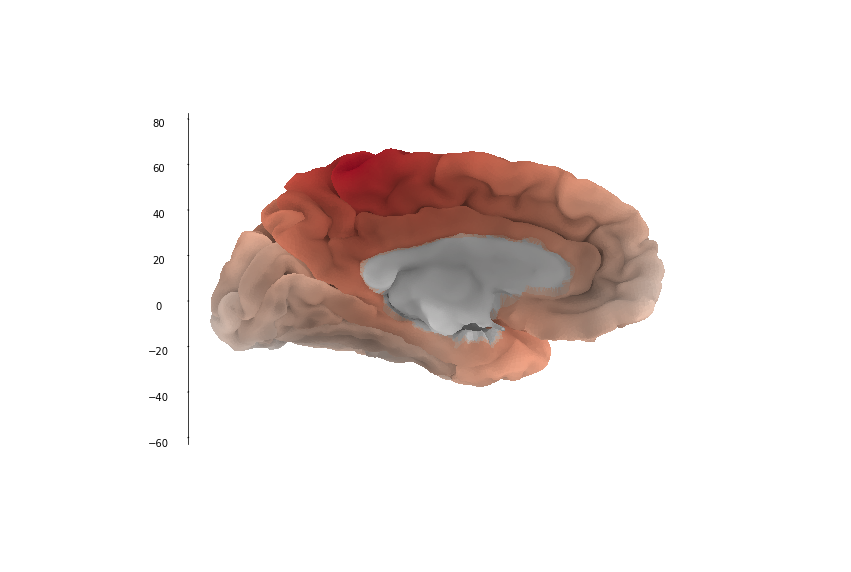

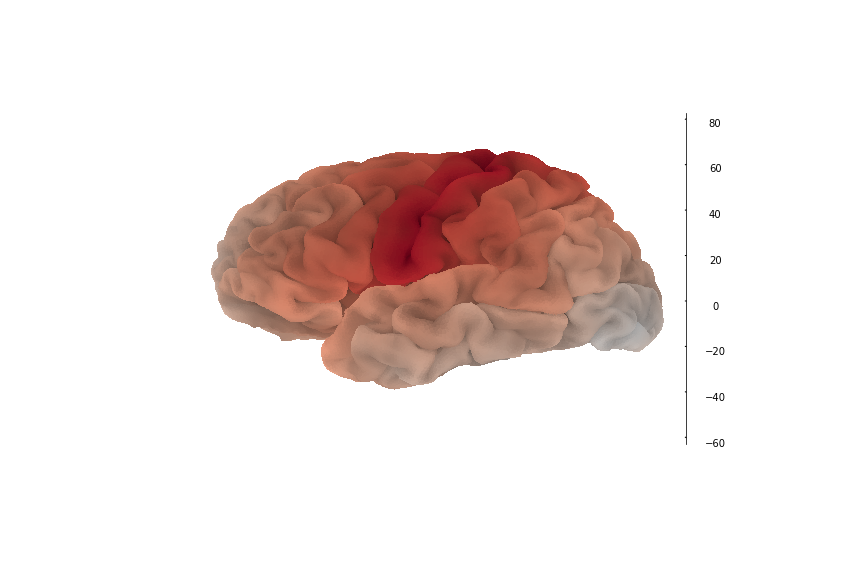

In [13]:
# visualize
plot_med, ax_med = sd.viz.viz(surf[0], surf[1], dist1, bg_map=sulc, bg_on_stat=True, cmap=cmap, figsize=((15,10)))
ax_med.axes.set_axis_off()
ax_med.grid(False)
plt.show()
plot_med.savefig('fig.dist1.med.png')
plot_lat, ax_lat = sd.viz.viz(surf[0], surf[1], dist1, azim=180, bg_map=sulc, bg_on_stat=True, cmap=cmap, figsize=((15,10)))
ax_lat.axes.set_axis_off()
ax_lat.grid(False)
plt.show()
plot_lat.savefig('fig.dist1.lat.png')

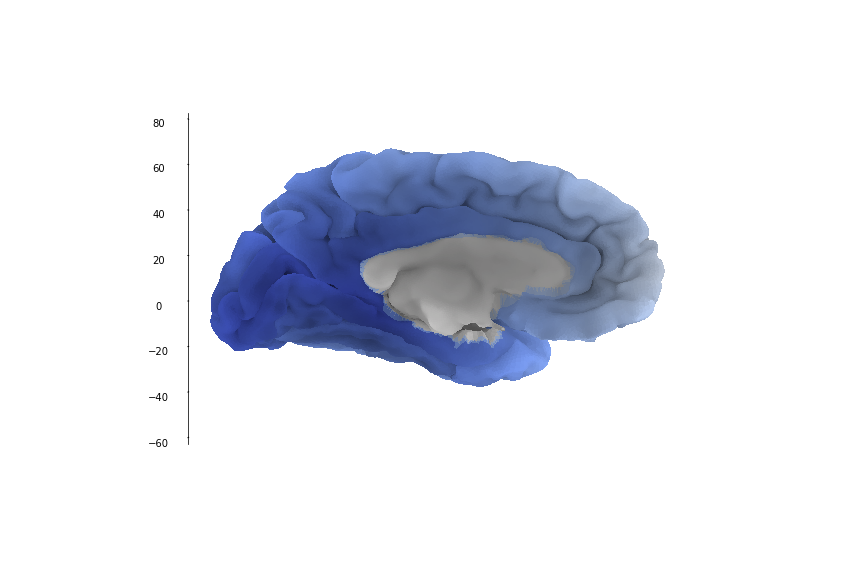

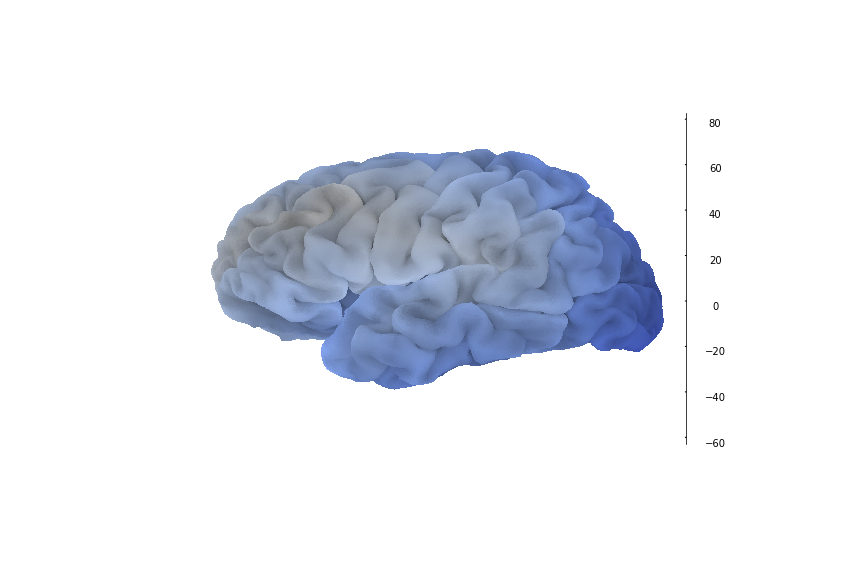

In [16]:
# visualize
plot_med, ax_med = sd.viz.viz(surf[0], surf[1], dist2, bg_map=sulc, bg_on_stat=True, cmap=cmap, figsize=((15,10)))
ax_med.axes.set_axis_off()
ax_med.grid(False)
plt.show()
plot_med.savefig('fig.dist2.med.png')
plot_lat, ax_lat = sd.viz.viz(surf[0], surf[1], dist2, azim=180, bg_map=sulc, bg_on_stat=True, cmap=cmap, figsize=((15,10)))
ax_lat.axes.set_axis_off()
ax_lat.grid(False)
plt.show()
plot_lat.savefig('fig.dist2.lat.png')

In [37]:
d = np.argmin(np.vstack((dist,distX)), axis=0)
d[cort] = d[cort] + 1

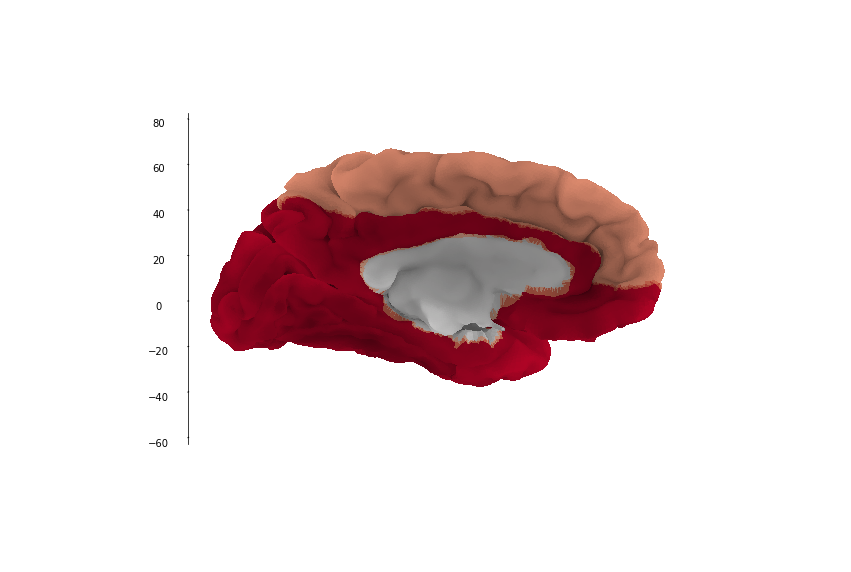

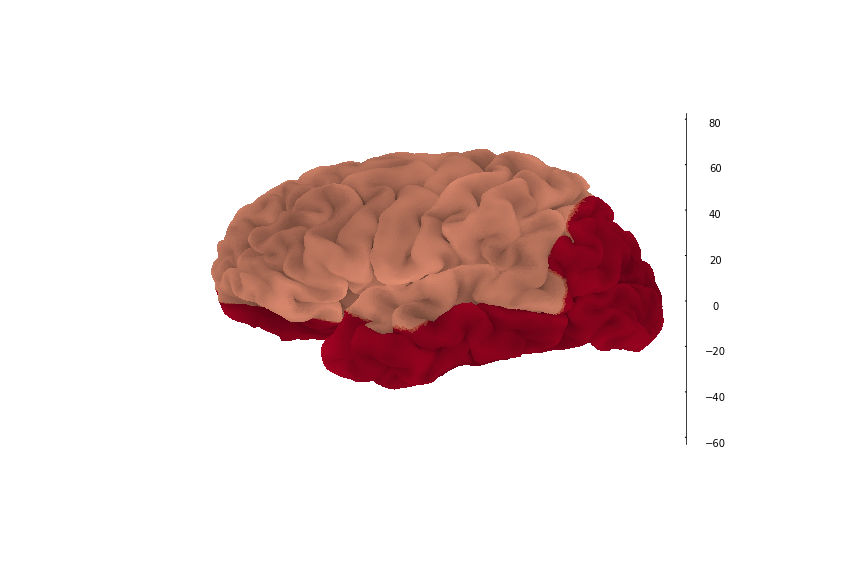

In [42]:
# visualize
plot_med, ax_med = sd.viz.viz(surf[0], surf[1], d, bg_map=sulc, bg_on_stat=True, cmap=cmap, figsize=((15,10)))
ax_med.axes.set_axis_off()
ax_med.grid(False)
plt.show()
plot_med.savefig('fig.dist3.med.png')
plot_lat, ax_lat = sd.viz.viz(surf[0], surf[1], d, azim=180, bg_map=sulc, bg_on_stat=True, cmap=cmap, figsize=((15,10)))
ax_lat.axes.set_axis_off()
ax_lat.grid(False)
plt.show()
plot_lat.savefig('fig.dist3.lat.png')

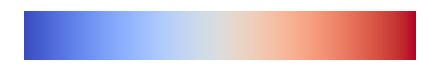

179.858349943
0.0


In [39]:
# save colorbar
gradient = np.linspace(0, 1, 256)
for x in range(5):
    gradient = np.vstack((gradient, gradient))

fig, ax = plt.subplots(nrows=1)
ax.imshow(gradient, cmap=cmap)
ax.set_axis_off()
fig.tight_layout()
plt.show()
fig.savefig('fig.cmap.colorbar.png')

print(np.max(dist))
print(np.min(dist))

In [32]:
# Calculate zones on individual
# load central sulcus and calcarine
regions = ['S_calcarine', 'S_central']
src = []
for r in regions:
    src.append(sd.load.load_freesurfer_label(os.path.join(base_dir, 'bert/label/lh.aparc.a2009s.annot'), r, cort))

# calculate zones
zone = sd.surfdist.zone_calc(surf, cort, src)

In [34]:
zones = zone.copy()
print np.unique(zone)

zone[np.where(zone == 1)] = -1
zone[np.where(zone == 2)] = 1

[ 0.  1.  2.]


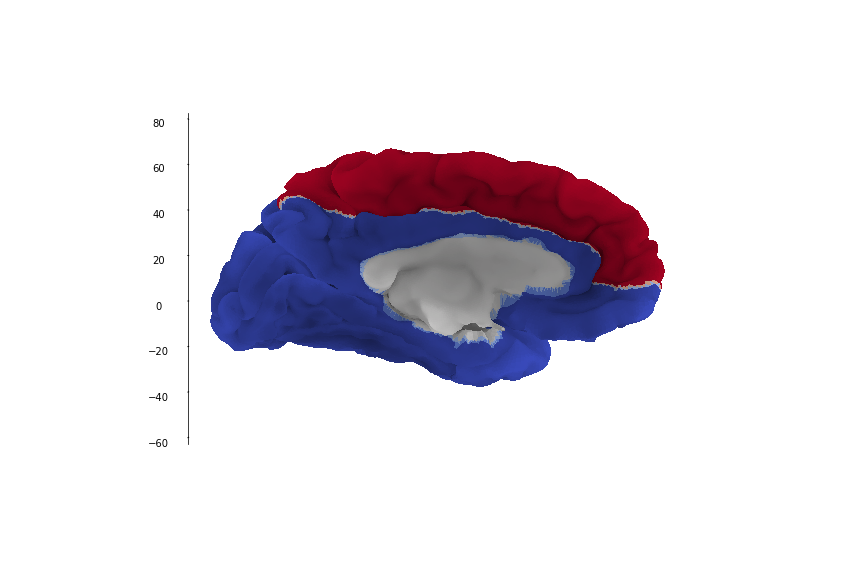

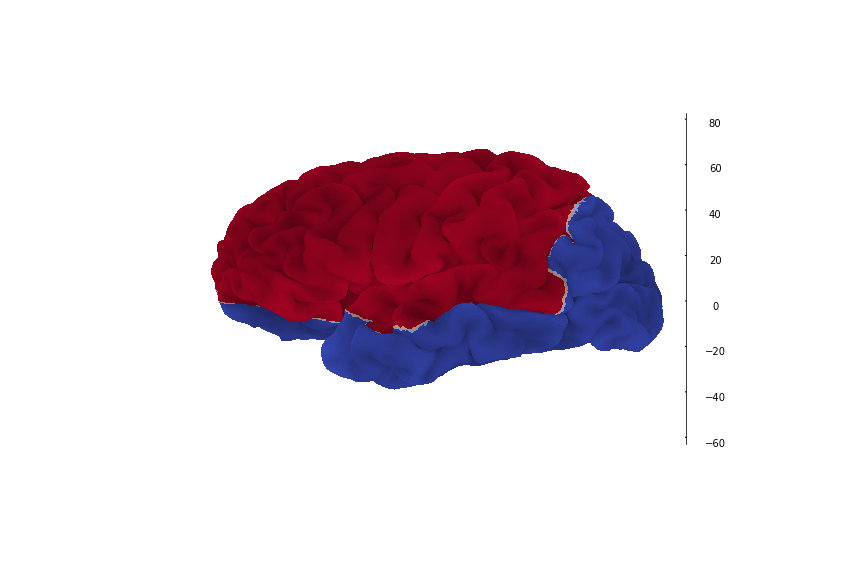

In [35]:
# visualize zones
plot_zones_med, ax_zones_med = sd.viz.viz(surf[0], surf[1], zone, bg_map=sulc, bg_on_stat=True, cmap=cmap, figsize=((15,10)))
ax_zones_med.axes.set_axis_off()
ax_zones_med.grid(False)
plt.show()
plot_zones_med.savefig('fig.zones.med.png')
plot_zones_lat, ax_zones_lat = sd.viz.viz(surf[0], surf[1], zone, azim=180, bg_map=sulc, bg_on_stat=True, cmap=cmap, figsize=((15,10)))
ax_zones_lat.axes.set_axis_off()
ax_zones_lat.grid(False)
plt.show()
plot_zones_lat.savefig('fig.zones.lat.png')

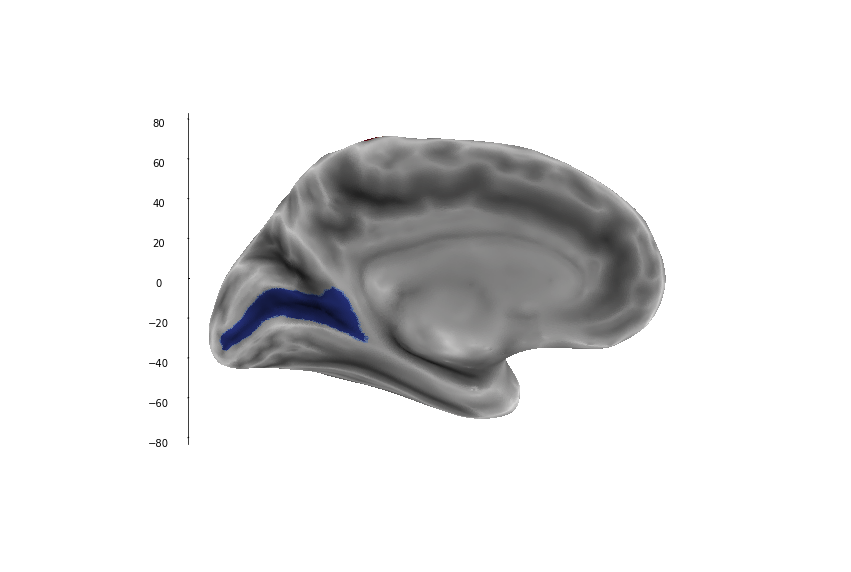

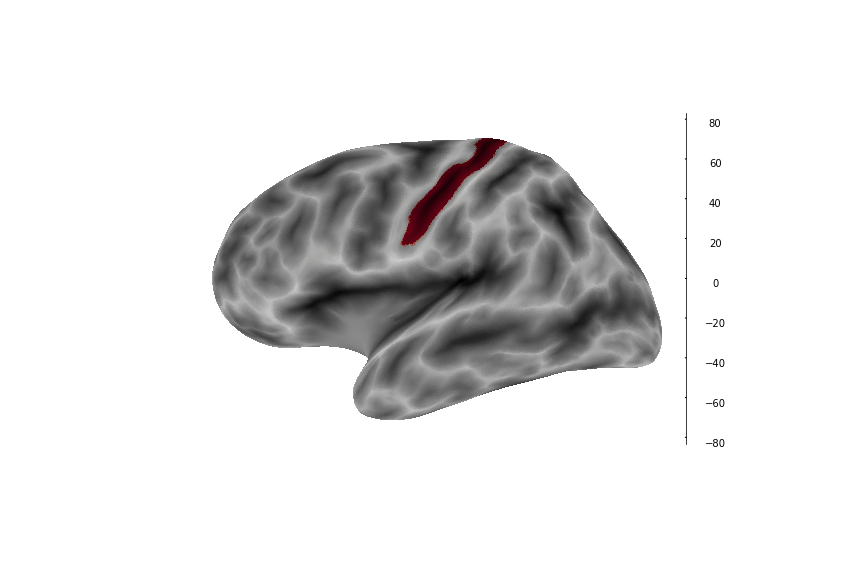

In [36]:
# make figures of masks
# load central sulcus and calcarine
regions = ['S_calcarine', 'S_central']
mask = np.zeros(len(surf[0]))
for n,r in enumerate(regions):
    if n == 0:
        mask[sd.load.load_freesurfer_label(os.path.join(base_dir, 'bert/label/lh.aparc.a2009s.annot'), r, cort)] = -1
    elif n == 1:
        mask[sd.load.load_freesurfer_label(os.path.join(base_dir, 'bert/label/lh.aparc.a2009s.annot'), r, cort)] = 1

surfi = nib.freesurfer.read_geometry(os.path.join(base_dir, 'bert/surf/lh.inflated'))
plot_mask_med, ax_med = sd.viz.viz(surfi[0], surfi[1], mask, bg_map=sulc, bg_on_stat=True, cmap=cmap, figsize=((15,10)))
ax_med.axes.set_axis_off()
ax_med.grid(False)
plt.show()
plot_mask_med.savefig('fig.mask.med.png')

plot_mask_lat, ax_lat = sd.viz.viz(surfi[0], surfi[1], mask, azim=180, bg_map=sulc, bg_on_stat=True, cmap=cmap, figsize=((15,10)))
ax_lat.grid(False)
ax_lat.axes.set_axis_off()
plt.show()
plot_mask_lat.savefig('fig.mask.lat.png')

# Calculate distances on native surface and display on fsaverage

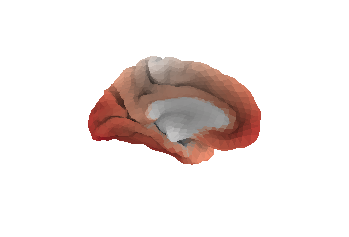

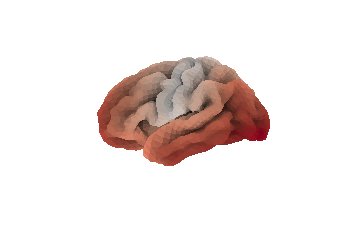

In [5]:
# load fsaverage4 
fsa4 = nib.freesurfer.read_geometry(os.path.join(base_dir,'fsaverage4/surf/lh.sphere.reg'))[0]
fsa4_sulc = nib.freesurfer.read_morph_data(os.path.join(base_dir, 'fsaverage4/surf/lh.sulc'))
fsa4_cort = np.sort(nib.freesurfer.read_label(os.path.join(base_dir, 'fsaverage4/label/lh.cortex.label')))
native = nib.freesurfer.read_geometry(os.path.join(base_dir, 'bert/surf/lh.sphere.reg'))[0]

# get corresponding nodes between native and fsaverage4
idx_fsa4_to_native = sd.utils.find_node_match(fsa4, native)[0]

# visualize results on fsaverage4 surface
surf_fsa4 = nib.freesurfer.read_geometry(os.path.join(base_dir, 'fsaverage4/surf/lh.pial'))
plot_fsa4_med = sd.viz.viz(surf_fsa4[0], surf_fsa4[1], dist[idx_fsa4_to_native], bg_map=fsa4_sulc, bg_on_stat=True, cmap=cmap)
plot_fsa4_lat = sd.viz.viz(surf_fsa4[0], surf_fsa4[1], dist[idx_fsa4_to_native], azim=180, bg_map=fsa4_sulc, bg_on_stat=True, cmap=cmap)

plt.show()

# Find zones closest to central sulcus or calcarine sulcus

In [ ]:
# load central sulcus and calcarine
regions = ['S_central', 'S_calcarine']
src = []
for r in regions:
    src.append(sd.load.load_freesurfer_label(os.path.join(base_dir, 'fsaverage4/label/lh.aparc.a2009s.annot'), r, fsa4_cort))

# calculate zones
zone = sd.surfdist.zone_calc(surf_fsa4, fsa4_cort, src)

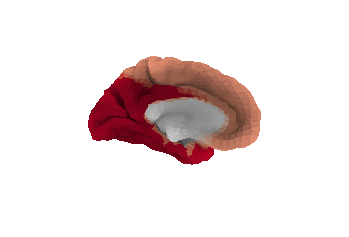

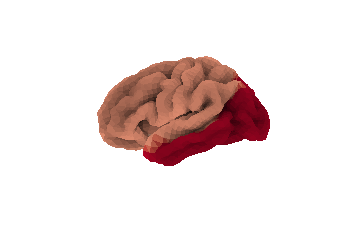

In [9]:
# visualize
plot_fsa4_med = sd.viz.viz(surf_fsa4[0], surf_fsa4[1], zone, bg_map=fsa4_sulc, bg_on_stat=True, cmap='jet', symmetric_cbar=False, )
plot_fsa4_lat = sd.viz.viz(surf_fsa4[0], surf_fsa4[1], zone, azim=180, bg_map=fsa4_sulc, bg_on_stat=True, cmap='jet')
plt.show()

# Calculating distance matrix

In [ ]:
# Example for running median distance calculation between all labels and outputting distance matrix:
dist_matrix, rois = dist_calc_matrix(surf, cort, os.path.join(base_dir, 'bert/label/lh.aparc.a2009s.annot'), 
                                     exceptions = ['Unknown', 'Medial_Wall'], dist_type = "median")